In [1]:
import os,sys
from dotenv import find_dotenv,load_dotenv
load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature
import data_reader_writer

# Setting up simulation period

We need to set the required inputs to simulate the LOPF such as the start data, end date and simualtion snaphsots

In [3]:
My_network=pypsa.Network()
My_network.import_from_csv_folder('LOPF_data_heat')
#My_network.import_from_csv_folder('LOPF_data_HeatPump')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_heat has buses, generators, lines, links, loads, storage_units


 Let us import the heat demand profiles

In [4]:
heating_EDRP=pd.read_csv('REMA/domestic_EDRP/scaled with normalised profiles/hourly heat demand total_withGasboilers_MW.csv')
heating_EDRP_DHN=pd.read_csv('REMA/domestic_EDRP/DHN/scaled with normalised profiles/hourly heat demand total_withDHN_MW.csv')
heating_RHPP=pd.read_csv('REMA/domestic_RHPP/scaled with normalised profiles/hourly heat demand total_withHPs_MW.csv')

In [5]:
#My_network.loads_t.p_set.div(1e3).plot(figsize=(12,4),ylabel='GW')    # plotting the demand
#load_heat=My_network.loads_t.p_set.groupby(My_network.loads.carrier,axis=1).sum().div(1e3)
#My_network.loads_t.p_set.iloc[:,0:29].sum().div(1e3)

In [6]:
p0=My_network.buses.index[0:29].tolist()
p1=My_network.buses.index[29:58].tolist()

In [7]:
# let us comment the code since we have to and then add p2g and chp or boiler later

#for i in range(29):     #uncomment this code if you want to use electricty 2 gas conversion, if you want to assume a separate gas pip is used for boiler comment this, and uncomment the gas boiler line of code
    #My_network.add(
    #'Link',
    #'P2G {}'.format(i+1),
    #bus0=p0[i],
    #bus1=p1[i],
    #efficiency=0.8,
    #capital_cost=1000,
        #p_nom_min=0,
        #p_nom_max=10000,
    #p_nom_extendable=True,
        #carrier='gas'
    #)
        
    
#for i in range(29):
 #   My_network.add(
  #  'Load',
   # 'load gasheating {}'.format (i+1),
   # bus='Heat Bus {}'.format(i+1),
    #    p_set=heating_EDRP.iloc[:,i+1].values.tolist(),
        #carrier='Natural Gas',
     #  carrier='heat',
    #)
    
    
    
    #for i in range(29):
        #My_network.add(
        #"Link",
        #"boiler {}".format(i+1),
        #bus0=p1[i],
        #bus1='Heat Bus {}'.format(i+1),
       #p_nom_extendable=True,
        #efficiency=0.94,
        #marginal_cost=20.0,
       # carrier="gas",
    #)
    
#for i in range(29):
   # My_network.add(
        #"Generator",
        #"boiler {}".format(i+1),
       # bus0=B0[i],
       #bus='Heat Bus {}'.format(i+1),
       #p_nom_extendable=True,
       #efficiency=0.94,
       # marginal_cost=20.0,
       # carrier="heat",
    #)
    
    

In [8]:
for i in range(29):
    My_network.add(
        "Generator",
        "boiler {}".format(i+1),
       bus='Heat Bus {}'.format(i+1),
       p_nom_extendable=True,
        ramp_limit_up=1,
        ramp_limit_down=1,
        efficiency=0.80,
        marginal_cost=20.0,
        carrier="heat",
    )

In [9]:
My_network.generators

,carrier,p_nom,type,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Drax - coal units,Coal,1980.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Ratcliffe,Coal,2000.0,,Ratcliffe,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Cottam,Coal,2008.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
West Burton,Coal,2012.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Eggborough,Coal,1960.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
boiler 25,heat,0.0,,Heat Bus 25,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 26,heat,0.0,,Heat Bus 26,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 27,heat,0.0,,Heat Bus 27,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [10]:
#for i in range(29):
    #My_network.add('Bus','Gas Bus {}'.format(i+1),carrier='gas')
    
#for i in range(29):
     #My_network.add(
    #"Link",
    #"CHP {}".format(i+1),
    #bus0="Gas Bus {}".format(i+1),
    #bus1="Heat Bus {}".format(i+1),
    #p_nom_extendable=True,
    #capital_cost=1400,
    #efficiency=0.8,
         #carrier='heat',
#)
        
#for i in range (29):   
   # My_network.add(
   # "Link",
   # "P2G {}".format(i+1),
    #bus0=My_network.buses.index.tolist()[29+i],
   # bus1='Gas Bus {}'.format(i+1),
  #  efficiency=0.8,
    #capital_cost=1000,
  #  p_nom_extendable=True,
#)

In [11]:
#My_network.links['p_nom_extendable']
My_network.links

,bus0,bus1,carrier,p_nom,marginal_cost,ramp_limit_up,ramp_limit_down,p_nom_min,p_nom_max,type,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Link,,,,,,,,,,,,,,,,,,,,,
heat pump Beauly,Beauly,Heat Bus 1,heat,104.988,0.0,1.0,1.0,0.0,104.988,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Peterhead,Peterhead,Heat Bus 2,heat,470.460,0.0,1.0,1.0,0.0,470.460,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Errochty,Errochty,Heat Bus 3,heat,219.324,0.0,1.0,1.0,0.0,219.324,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Denny/Bonnybridge,Denny/Bonnybridge,Heat Bus 4,heat,1601.760,0.0,1.0,1.0,0.0,1601.760,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Neilston,Neilston,Heat Bus 5,heat,261.828,0.0,1.0,1.0,0.0,261.828,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Strathaven,Strathaven,Heat Bus 6,heat,2968.704,0.0,1.0,1.0,0.0,2968.704,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Torness,Torness,Heat Bus 7,heat,486.348,0.0,1.0,1.0,0.0,486.348,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Eccles,Eccles,Heat Bus 8,heat,151.980,0.0,1.0,1.0,0.0,151.980,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Harker,Harker,Heat Bus 9,heat,363.204,0.0,1.0,1.0,0.0,363.204,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [12]:
# Adding the DHN Demand to the PyPSA-GB Network
#for i in range(29):
   # My_network.add(
   # 'Load',
    #'load DHN {}'.format(i+1),
    #bus='Heat Bus {}'.format(i+1),
        #p_set=heating_EDRP_DHN.iloc[:,i+1].values.tolist(),
        #carrier='heat'
   # )

In [13]:
My_network.loads_t.p_set
My_network.generators

,carrier,p_nom,type,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Drax - coal units,Coal,1980.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Ratcliffe,Coal,2000.0,,Ratcliffe,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Cottam,Coal,2008.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
West Burton,Coal,2012.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Eggborough,Coal,1960.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
boiler 25,heat,0.0,,Heat Bus 25,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 26,heat,0.0,,Heat Bus 26,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 27,heat,0.0,,Heat Bus 27,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


To approximate n-1 security and allow room for reactive power flows, don't allow any line to be loaded above 70% of thier thermal rating

In [14]:
contingency_factor = 0.7
My_network.lines.s_max_pu[0:99] *= contingency_factor

In [15]:
COPs=pd.read_csv('LOPF_data_heat/hourly COP_HPs.csv')
cop_1=COPs['Beauly COP'].values.tolist()

In [16]:
B0=My_network.buses.index[0:29].tolist()
B1=My_network.buses.index[29:58].tolist()


In [17]:
 #My_network.loads_t.p_set['load gas 1']

In [18]:
#My_network.loads_t.p_set['load DHN 1']

In [19]:
My_network.loads_t.p_set['Beauly_h_load']     # this is the aggregate total heat demand at beauly node including the HPs, gas boilers and those connected with the DHNs

snapshot
2016-01-01 00:00:00     456.475010
2016-01-01 01:00:00     456.475010
2016-01-01 02:00:00     456.475010
2016-01-01 03:00:00     480.791023
2016-01-01 04:00:00     841.968923
                          ...     
2016-12-30 19:00:00    6280.158735
2016-12-30 20:00:00    6280.158735
2016-12-30 21:00:00    6280.158735
2016-12-30 22:00:00    6280.158735
2016-12-30 23:00:00    6280.158735
Name: Beauly_h_load, Length: 8760, dtype: float64

In [20]:
My_network.generators

,carrier,p_nom,type,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Drax - coal units,Coal,1980.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Ratcliffe,Coal,2000.0,,Ratcliffe,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Cottam,Coal,2008.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
West Burton,Coal,2012.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Eggborough,Coal,1960.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
boiler 25,heat,0.0,,Heat Bus 25,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 26,heat,0.0,,Heat Bus 26,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 27,heat,0.0,,Heat Bus 27,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [21]:
My_network

PyPSA Network
Components:
 - Bus: 64
 - Generator: 686
 - Line: 105
 - Link: 29
 - Load: 64
 - StorageUnit: 33
Snapshots: 8760

In [22]:
My_network.storage_units
My_network.loads_t.p_set
My_network.generators_t.marginal_cost.columns

Index(['Drax - coal units', 'Ratcliffe', 'Cottam', 'West Burton', 'Eggborough',
       'Rugeley', 'Aberthaw B', 'Fiddler`s Ferry', 'Severn Power',
       'Baglan Bay CCGT', 'Sutton Bridge', 'Barry', 'Glanford Brigg',
       'Killingholme', 'Langage', 'Peterborough', 'South Humber Bank', 'Corby',
       'Castleford', 'Connahs Quay', 'Cottam Development Centre', 'Enfield',
       'Grain CHP *', 'Sandbach', 'Thornhill', 'West Burton CCGT', 'Deeside',
       'Saltend', 'Coryton', 'Rocksavage', 'Spalding', 'Marchwood', 'Didcot B',
       'Great Yarmouth', 'Little Barford', 'Pembroke', 'Staythorpe C',
       'Medway', 'Peterhead', 'Keadby', 'Damhead Creek', 'Rye House',
       'Shoreham', 'Blackburn', 'Seabank 1', 'Seabank 2', 'Baglan Bay OCGT',
       'Barkantine Heat & Power Company *', 'London Heat & Power Company *',
       'Fellside CHP *', 'Chippenham', 'Pilkington - Greengate *',
       'Wilton GT2', 'Wilton GT1 *', 'Knapton', 'VPI Immingham *',
       'Burghfield', 'Chickerell', 'Dra

In [23]:
My_network.consistency_check()    # will make to check if there is any inconsistency in the network that will lead to infeasibility

In [24]:
 #My_network.lopf(My_network.snapshots,solver_name="gurobi", pyomo=False)
My_network.optimize(solver_name='gurobi')  # 

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
INFO:linopy.model: Solve linear problem using Gu

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-29


Read LP format model from file C:\Users\salene\AppData\Local\Temp\linopy-problem-nh20o1wv.lp
Reading time = 80.19 seconds
obj: 29589966 rows, 8050499 columns, 53415703 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 29589966 rows, 8050499 columns and 53415703 nonzeros
Model fingerprint: 0xd31095bd
Coefficient statistics:
  Matrix range     [6e-05, 3e+03]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+07, 1e+07]
  RHS range        [4e-06, 1e+06]
Presolve removed 27268582 rows and 239099 columns (presolve time = 5s) ...
Presolve removed 27268582 rows and 239099 columns (presolve time = 10s) ...
Presolve removed 27268582 rows and 239099 columns (presolve time = 15s) ...
Presolve removed 27268582 rows and 3151413 columns (presolve time = 20s) ...
Presolve removed 2774

  87   1.03571077e+11  1.03536249e+11  2.65e-01 8.53e-14  6.72e+00   405s
  88   1.03569235e+11  1.03536561e+11  2.49e-01 8.53e-14  6.30e+00   409s
  89   1.03568077e+11  1.03537232e+11  2.39e-01 8.53e-14  5.95e+00   413s
  90   1.03567014e+11  1.03537623e+11  2.29e-01 8.53e-14  5.67e+00   417s
  91   1.03565824e+11  1.03537876e+11  2.17e-01 1.06e-13  5.39e+00   420s
  92   1.03564392e+11  1.03538339e+11  2.06e-01 8.53e-14  5.02e+00   424s
  93   1.03563491e+11  1.03538810e+11  1.99e-01 8.53e-14  4.76e+00   428s
  94   1.03562827e+11  1.03539000e+11  1.92e-01 8.53e-14  4.59e+00   431s
  95   1.03561714e+11  1.03539388e+11  1.83e-01 6.91e-14  4.30e+00   436s
  96   1.03560879e+11  1.03539767e+11  1.75e-01 6.95e-14  4.06e+00   440s
  97   1.03560234e+11  1.03539904e+11  1.69e-01 7.47e-14  3.91e+00   444s
  98   1.03559172e+11  1.03540255e+11  1.60e-01 7.76e-14  3.64e+00   448s
  99   1.03557973e+11  1.03540481e+11  1.49e-01 7.11e-14  3.37e+00   452s
 100   1.03557189e+11  1.03540568e+11 

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 8050499 primals, 29589966 duals
Objective: 1.04e+11
Solver model: available
Solver message: 2



('ok', 'optimal')

In [25]:
My_network.generators_t.p

Generator,Drax - coal units,Ratcliffe,Cottam,West Burton,Eggborough,Rugeley,Aberthaw B,Fiddler`s Ferry,Dungeness B,Hartlepool,...,boiler 20,boiler 21,boiler 22,boiler 23,boiler 24,boiler 25,boiler 26,boiler 27,boiler 28,boiler 29
snapshot,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,766.5,861.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2016-01-01 01:00:00,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,766.5,861.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2016-01-01 02:00:00,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,766.5,861.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2016-01-01 03:00:00,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,766.5,861.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2016-01-01 04:00:00,741.506561,0.0,0.0,1488.3777,0.0,0.0,1586.0,0.0,766.5,861.4,...,0.000000,1113.531925,0.000000,0.000000,0.000000,0.000000,755.330440,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,1980.000000,2000.0,2008.0,2012.0000,1960.0,1006.0,1586.0,1961.0,766.5,861.4,...,14348.490066,24190.882410,0.000000,27995.613259,8671.884360,0.000000,8004.293524,1838.567335,2649.127320,0.0
2016-12-30 20:00:00,1980.000000,2000.0,2008.0,2012.0000,1960.0,1006.0,1586.0,1961.0,766.5,861.4,...,14329.398204,8240.177230,3969.604811,54467.702330,12502.890774,7516.500016,57667.233032,12347.763178,7368.952820,0.0
2016-12-30 21:00:00,1980.000000,2000.0,2008.0,2012.0000,1960.0,1006.0,1586.0,1961.0,766.5,861.4,...,14303.942388,4369.850781,1299.540766,56210.059880,11453.249426,6823.274352,43646.033798,9448.217974,2781.600606,0.0


In [26]:
My_network.generators.p_nom_opt.div(1e3) # GW  optimised capacity of generators in GW
My_network.storage_units.p_nom_opt.div(1e3)  # GW 
#My_network.links_t.efficiency 
My_network.storage_units

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
Dinorwig,1728.0,Pumped Storage Hydroelectric,0.0,5.266,0.865,0.865,9099.648,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1728.000000
Ffestiniog,360.0,Pumped Storage Hydroelectric,0.0,3.889,0.850,0.850,1400.040,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,360.000000
Cruachan,440.0,Pumped Storage Hydroelectric,0.0,16.136,0.865,0.865,7099.840,Errochty,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,440.000000
Foyers,300.0,Pumped Storage Hydroelectric,0.0,21.000,0.865,0.865,6300.000,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,300.000000
STES_Beauly,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 1,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.830862
STES_Peterhead,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 2,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1258.469168
STES_Errochty,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 3,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318
STES_Denny/BonnyBdige,501.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 4,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,3621.062135
STES_Neilston,502.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 5,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318


In [27]:
#My_network.storage_units.p_nom_opt
#let us visualise this
#fig, ax=plt.subplots(1,1)
#fig.set_size_inches(19, 11)
#My_network.storage_units.p_nom_opt.div(1e3).plot.area()
#My_network.storage_units.p_nom_opt.div(1e3).plot()
#plt.legend()

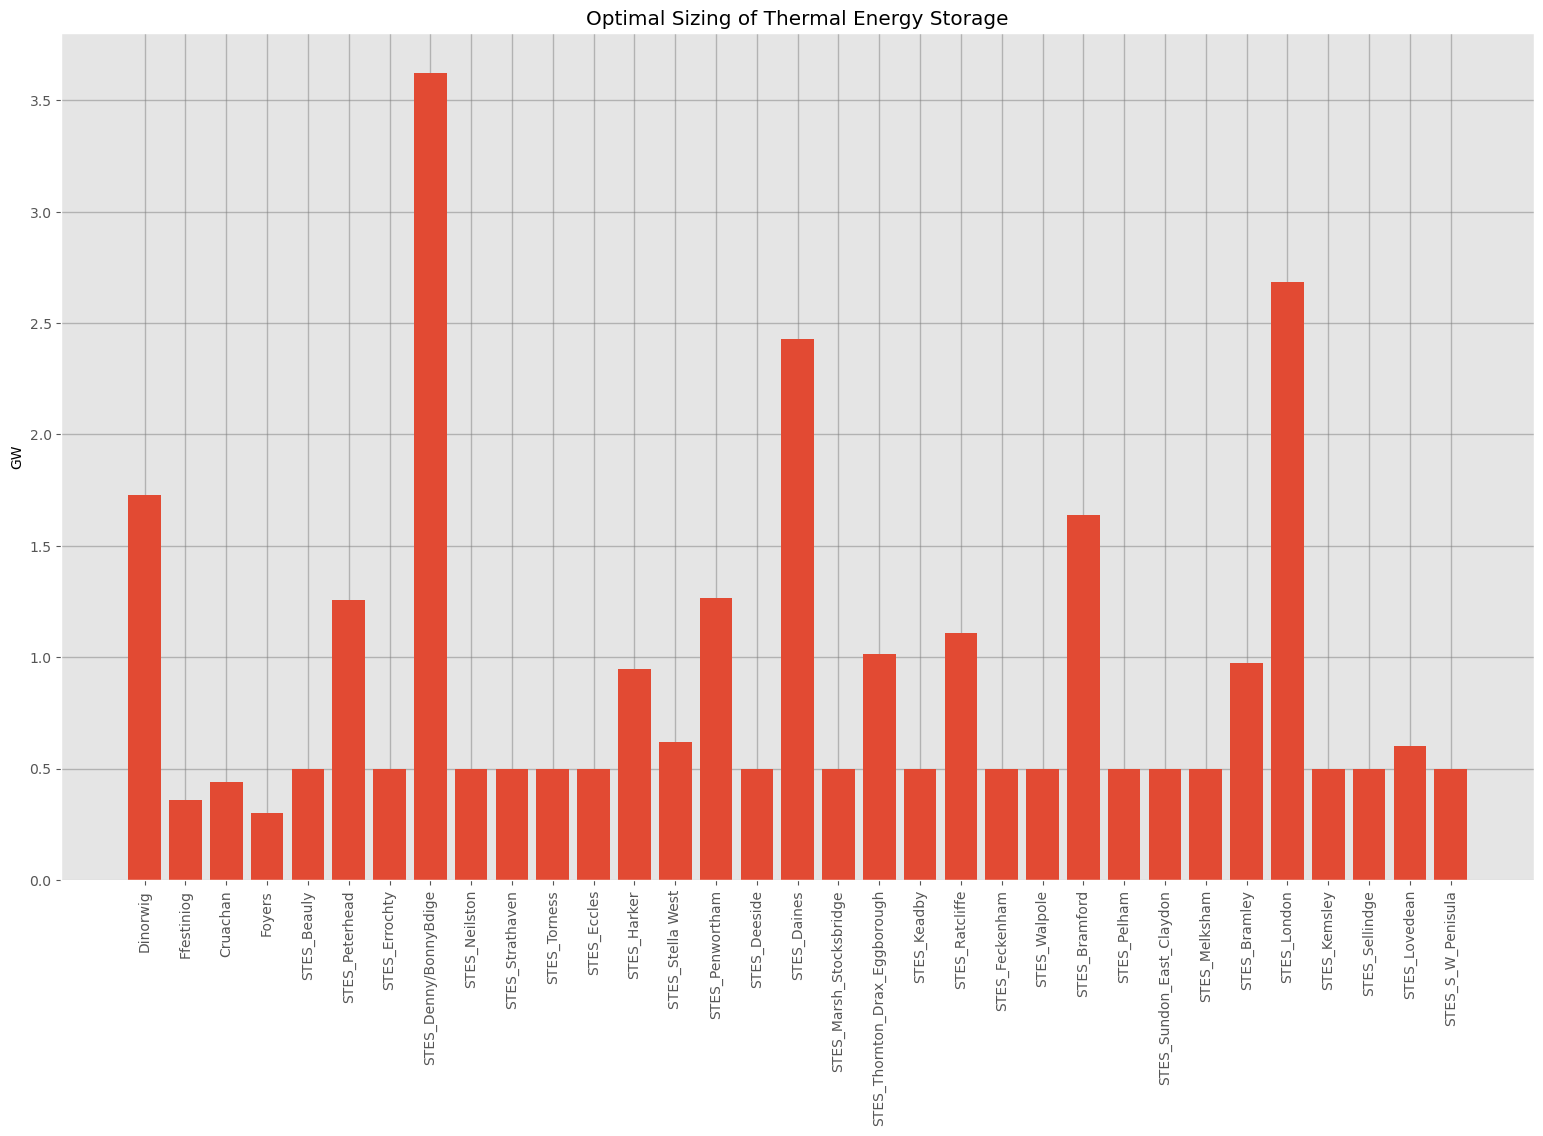

In [28]:
plt.figure(figsize=(19,11))
plt.bar(My_network.storage_units.index, My_network.storage_units.p_nom_opt.div(1e3).values)

plt.xticks(My_network.storage_units.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Optimal Sizing of Thermal Energy Storage')
plt.show()

# Power output by generation type

In [29]:
p_by_carrier = My_network.generators_t.p.groupby(
    My_network.generators.carrier, axis=1).sum()

storage_by_carrier = My_network.storage_units_t.p.groupby(
    My_network.storage_units.carrier, axis=1).sum()
# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0
p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)



# interconnector exports
exports = My_network.loads_t.p
# multiply by negative one to convert it as a generator
# i.e. export is a positive load, but negative generator
exports['Interconnectors Export'] = exports.iloc[:, -6:].sum(axis=1) * -1
interconnector_export = exports[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'] +
    p_by_carrier['Landfill Gas'] + p_by_carrier['Anaerobic Digestion'] +
    p_by_carrier['Sewage Sludge Digestion'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

carrier,Anaerobic Digestion,Biomass (co-firing),Biomass (dedicated),Coal,EfW Incineration,Interconnectors Import,Landfill Gas,Hydro,Natural Gas,Nuclear,...,Sewage Sludge Digestion,Shoreline Wave,Small Hydro,Solar Photovoltaics,Wind Offshore,Wind Onshore,heat,Pumped Storage Hydroelectric,Seasonal Thermal Energy Storage,Biomass
snapshot,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,244.2,0.00,0.00,0.000000,356.436,2882.499889,743.5,612.898037,24574.637584,6510.14,...,44.4,23.0,65.710291,0.0,3350.163489,4240.760137,13131.693045,0.000000,25947.172363,1032.10
2016-01-01 01:00:00,244.2,0.00,0.00,0.000000,356.436,2722.000051,743.5,575.291438,24066.702132,6510.14,...,44.4,24.0,67.208562,0.0,2777.624448,3892.858436,10448.461576,0.000000,25785.919517,1032.10
2016-01-01 02:00:00,244.2,0.00,0.00,0.000000,356.436,2719.500032,743.5,574.843740,25531.579120,6510.14,...,44.4,24.0,67.156260,0.0,1814.238046,3387.402432,10769.237339,0.000000,25901.696891,1032.10
2016-01-01 03:00:00,244.2,0.00,0.00,0.000000,356.436,2641.499956,743.5,683.634261,27014.985324,6510.14,...,44.4,24.0,79.865739,0.0,860.112342,2721.478337,13610.162594,7.798830,25992.478638,1032.10
2016-01-01 04:00:00,244.2,0.00,0.00,3815.884261,356.436,2630.000016,743.5,847.939286,28682.300000,6510.14,...,44.4,24.0,99.060714,0.0,525.235356,2367.560763,40255.420896,37.928448,26011.518477,1032.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,244.2,509.54,1007.40,14513.000000,356.436,1862.500033,743.5,632.238738,28761.059837,6510.14,...,44.4,23.0,67.450016,0.0,2197.461750,5408.172068,466676.585865,0.000000,0.000000,2549.04
2016-12-30 20:00:00,244.2,509.54,1026.38,14513.000000,356.436,1009.500030,743.5,575.361724,28730.193907,6510.14,...,44.4,23.0,60.522377,0.0,2263.032763,5397.570857,617910.316986,0.000000,0.000000,2568.02
2016-12-30 21:00:00,244.2,509.54,1007.40,14513.000000,356.436,1063.500048,743.5,841.981703,28718.253146,6510.14,...,44.4,23.0,59.262806,0.0,2311.246482,5371.752929,522042.461280,0.000000,0.000000,2549.04


Graph the power output of the different generation types

# Plotting Optimal Dispatch

AttributeError: Line2D.set() got an unexpected keyword argument 'line_width'

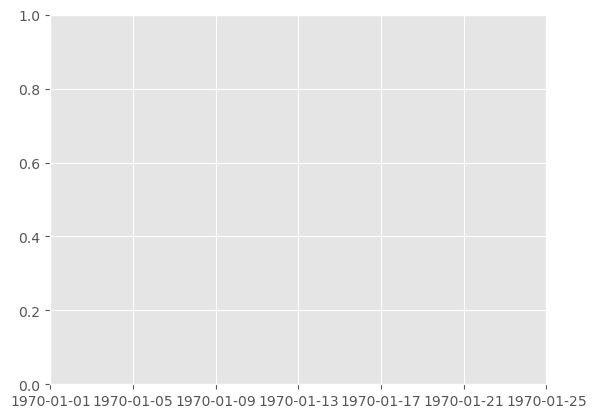

In [30]:
My_network.storage_units.p_nom_opt.div(1e3)*My_network.storage_units.max_hours      #GWh  storage full capcity
# Let us plot the optimal dispatch
p_by_carrier=My_network.generators_t.p.groupby(My_network.generators.carrier,axis=1).sum().div(1e3)
sto=My_network.storage_units_t.p.groupby(My_network.storage_units.carrier, axis=1).sum().div(1e3)
My_network.storage_units_t.p
carrier = pd.concat([p_by_carrier, sto], axis=1)
carrier

#fig, ax = plt.subplots(figsize=(6, 3))
#color = p_by_carrier.columns.map(My_network.carriers.color)
    
#p_by_carrier.where(p_by_carrier>0).loc[My_network.snapshots].plot.area(
      #  ax=ax,
        #linewidth=0,
        #color=color,
   # )
dispatch = pd.concat([My_network.generators_t.p, My_network.storage_units_t.p], axis=1).div(1e3)       #GW

dispatch.where(dispatch > 0, 0).plot.area(
    stacked=True, line_width=0,
    width=1300,
    height=350,
    hover=False,
    #color=[My_network.carriers.at[c, 'color'] for c in dispatch.columns],
    ylabel='electricity supply [GW]',
    ylim=(0,180)
)

In [ ]:
My_network.statistics.capex()
My_network.statistics.opex()
# total system cost
System_cost = My_network.statistics.capex() + My_network.statistics.opex(aggregate_time='sum')
# Alternative option for claculate the cost
#opex = My_network.snapshot_weightings.generators @ (My_network.generators.marginal_cost * My_network.generators_t.p).div(1e6) # M€/a
#capex = (My_network.generators.p_nom_opt * My_network.generators.capital_cost).div(1e6) # M€/a
#capex_storage = (My_network.storage_units.p_nom_opt * My_network.storage_units.capital_cost).div(1e6) # M€/a
#System_cost=pd.concat([opex, capex, capex_storage], axis=1).sum(axis=1)
#System_cost
#System_cost.plot.pie(figsize=(2,2))

#series_without_nan = System_cost.dropna()
#series_without_nan.plot.pie(figsize=(2,2))

# compute the cost per unit of electricity consumed:

In [ ]:
demand = My_network.snapshot_weightings.generators @ My_network.loads_t.p_set.sum(axis=1)
#System_cost.sum()*1e6 / demand.sum()
System_cost.sum()/demand.sum()

In [ ]:
# Sensitivty analysis
#sensitivity = {}
#for co2 in [150,100,50,25,0]:
   # My_network.global_constraints.loc["CO2Limit", "constant"] = co2 * 1e6
   # My_network.optimize(solver_name='gurobi')
    

In [ ]:
df_network = pd.read_csv('LOPF_data_heat/buses.csv')
lon = df_network.iloc[28:]['x'].values
lat = df_network.iloc[28:]['y'].values
coordinates = np.zeros(shape=(len(lon), 2))
for i in range(len(lon)):
    coordinates[i][0] = lon[i]
    coordinates[i][1] = lat[i]

df_lines = pd.read_csv('LOPF_data_heat/lines.csv', index_col=0)
df_buses = pd.read_csv('LOPF_data_heat/buses.csv', index_col=0)

# Extract the coordinates of buses and lines for the sake of plotting
line_coordinates = []
for i in range(len(df_lines['bus0'].values)):

    bus0 = df_lines['bus0'].iloc[i]
    bus1 = df_lines['bus1'].iloc[i]
    bus0_coord = [df_buses.iloc[29:]['x'][bus0], df_buses.iloc[29:]['y'][bus0]]
    bus1_coord = [df_buses.iloc[29:]['x'][bus1], df_buses.iloc[29:]['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])
    

In [ ]:
df_buses.iloc[28:].index
#df_lines['bus0'].iloc[98]

In [ ]:
# then using the above information, plot the network
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

#extent = [-8.09782, 2.40511, 60, 49.5]
#ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='black')

# display the rconnection for the heat buses and also the electric bus Beally connection with the heat bus 3 in the figure
#for h in range(4):
 #   ax.plot([df_buses['x'].iloc[h],df_buses['x'].iloc[h+1]],
 #           [df_buses['y'].iloc[h],df_buses['y'].iloc[h+1]],
 #          color='red')
    
# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')

#ax.scatter(lon[0:4], lat[0:4], c='red', edgecolors='red')
#ax.scatter(lon[4:], lat[4:], c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses.iloc[29:57].index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='blue',
                fontsize='large')

ax.set_title('Reduced GB network with four heat buses  close to the first four electric buses', fontsize=20)
fig.tight_layout()

In [ ]:
My_network.links_t.p0

In [ ]:
My_network.links_t.efficiency

In [ ]:
My_network.links_t.p1

In [ ]:
p_by_carrier=My_network.generators_t.p.groupby(My_network.generators.carrier,axis=1).sum().div(1e3) #GW
p_by_carrier

In [ ]:
#My_network.generators.index[657]
#My_network.generators['p_nom_opt'][657]
#y_network.loads_t.p_set['load gas 1']
#My_network.generators_t.p

In [ ]:
fig, ax= plt.subplots(figsize=(19, 6))

p_by_carrier.plot(ax=ax,kind='area')
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.05),
         fancybox=True,shadow=True,ncol=4)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylabel('GW')
ax.set_xlabel('')

In [ ]:
# interconnector exports
exports = My_network.loads_t.p
# multiply by negative one to convert it as a generator
# i.e. export is a positive load, but negative generator
exports['Interconnectors Export'] = exports.iloc[:, -6:].sum(axis=1) * -1

interconnector_export = exports[['Interconnectors Export']]


# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'] +
    p_by_carrier['Landfill Gas'] + p_by_carrier['Anaerobic Digestion'] +
    p_by_carrier['Sewage Sludge Digestion'])


# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

In [ ]:
# Add the heat pump dispatch to the generation data frame
p_hp=My_network.links_t.p1.sum(axis=1)
p_by_carrier['Heat Pump']=p_hp.values.tolist()

In [ ]:
p_by_carrier

In [ ]:
cols = ["Nuclear", 'Shoreline Wave', 'Biomass',
        'EfW Incineration',
        "Coal", "Oil", "Natural Gas", 'Hydro',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import','Heat Pump'
       ]

In [ ]:
# we have aroudn 20 columns (generation type) but let us visualise the generation for the following types
#cols = ["Nuclear", 'Shoreline Wave', 'Biomass',
        #'EfW Incineration',
        #"Coal", "Oil", "Natural Gas", 'Pumped Storage Hydroelectric', 'Hydro',
        #"Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        #'Interconnectors Import','Heat Pump'
       # ]
p_by_carrier = p_by_carrier[cols]



#p_by_carrier.drop(
    #(p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    #axis=1, inplace=True)

    

colors = {
        "Coal": "grey",
        "Diesel/Gas oil": "black",
        "Diesel/gas Diesel/Gas oil": "black",
        'Oil': 'black',
        'Anaerobic Digestion': 'green',
        'EfW Incineration': 'chocolate',
        'Sewage Sludge Digestion': 'green',
        'Landfill Gas': 'green',
        'Biomass (dedicated)': 'green',
        'Biomass (co-firing)': 'green',
        'Biomass': 'green',
        'Interconnectors Import': 'pink',
        "Sour gas": "lightcoral",
        "Natural Gas": "lightcoral",
        "Nuclear": "orange",
        'Shoreline Wave': 'aqua',
        'Tidal Barrage and Tidal Stream': 'aqua',
        'Hydro': "turquoise",
        "Large Hydro": "turquoise",
        "Small Hydro": "turquoise",
        "Pumped Storage Hydroelectric": "darkturquoise",
        "Wind Offshore": "lightskyblue",
        'Wind Onshore': 'deepskyblue',
        'Solar Photovoltaics': 'yellow',
        'Heat Pump': 'red'
}

    
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,8)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])   
    
    
    # Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])

    
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("Dispatch in GW")
ax.set_xlabel("")

In [ ]:
My_network.storage_units_t.p['STES_Beauly']
My_network.storage_units_t.p_store['STES_Beauly'].plot()
My_network.storage_units_t.p_dispatch['STES_Beauly'].plot() 
My_network.generators_t.p['boiler 1']
My_network.links_t.p1['heat pump Beauly']
326.129451+130

In [ ]:
My_network.storage_units_t.state_of_charge

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_storage=My_network.storage_units_t.p.sum(axis=1)
p_storage.plot(ax=ax,label='Thermal Energy Storage Dispatch',linewidth=1.5)

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = My_network.storage_units_t.p.sum(axis=1)
state_of_charge = My_network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="STES", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

In [ ]:
My_network.generators_t.p_max_pu

In [ ]:
My_network.generators

Plotting line loading
Look at the line loading stats and graph it

In [ ]:
My_network.snapshots[139]

In [ ]:
now = My_network.snapshots[139]

print("With the linear load flow, there is the following per unit loading:")
loading = My_network.lines_t.p0.loc[now] / My_network.lines.s_nom
loading.describe()

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)
My_network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

In [ ]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,8)
My_network.buses_t.marginal_price.iloc[:,0:29].plot(ax=ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6)


# negative mariginal price? what does it tell? during summer?

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

My_network.plot(ax=ax, line_widths=pd.Series(1, My_network.lines.index))
plt.hexbin(My_network.buses.x, My_network.buses.y,
           gridsize=20,
           C=My_network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar
cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

# Visualization

 plotting curtailment

In [ ]:
My_network.generators_t.p_max_pu.columns

In [ ]:
name='Wind Offshore Deeside'
type(My_network.generators_t.p_max_pu[name])
#My_network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
#p_available = My_network.generators_t.p_max_pu
wind_offshore_deeside_available=My_network.generators.at[name,'p_nom']*My_network.generators_t.p_max_pu[name]
# next find the dispatched power at deeside
dispatched_wind_offshore_deeside=My_network.generators_t.p['Wind Offshore Deeside']
curtailed_wind_offshore_deeside=wind_offshore_deeside_available-dispatched_wind_offshore_deeside

capacity = My_network.generators.at[name, "p_nom"]
capacity_t=pd.Series(capacity,index=My_network.generators_t.p['Wind Offshore Deeside'].index,name='Wind Offshore Capacity')
capacity_t

wind_offshore_deeside_df=pd.concat([capacity_t,dispatched_wind_offshore_deeside.rename('Wind Offshore Deeside Dispatched'),wind_offshore_deeside_available.rename('Wind Offshore Deeside Available')],axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
wind_offshore_deeside_df.plot(ax=ax)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

In [ ]:
carrier = "Wind Onshore"

capacity = My_network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = My_network.generators_t.p_max_pu.multiply(My_network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(My_network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

Visualize the density of dwellings (number of dwellings) per each clustered local authority area. This will help the density of heat demand, connected to DHNs and HP in each clustered local authority area across GB.

In [ ]:
My_network.generators_t.marginal_cost
#My_network.objective
#opex = My_network.snapshot_weightings.generators @ (My_network.generators_t.p * My_network.generators.marginal_cost).div(1e6) # M€/a

In [ ]:
#missions = My_network.generators_t.p / My_network.generators.efficiency * My_network.generators.carrier.map(My_network.carriers.co2_emissions) # t/h
#emissions
#My_network.generators_t.p.columns

In [ ]:
My_network.generators.carrier.map(My_network.carriers.co2_emissions) # t/h
My_network.objective/1e9 # this is the total system cost in billion Pounds per year